# Análisis Estadístico Multivariable - Otoño 2025
# Acoyani Garrido Sandoval

In [1]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot as pyplot

## 1. Descargar el conjunto de datos winequality-red.csv y cargarlo en PANDAS

In [2]:
# Cargar el conjunto de datos
df = pandas.read_csv('winequality-red.csv', sep=',')

## 2. Indicar cuáles son las variables numéricas y cuáles son las categóricas.

1. Variables categóricas:
    - quality
3. Variables numéricas:
    - fixed acidity
    - volatile acidity
    - citric acid
    - residual sugar
    - chlorides
    - free sulfur dioxide
    - total sulfur dioxide
    - density
    - pH
    - sulphates
    - alcohol

## 3. Realizar un gráfico pairsplot de todas las variables numéricas.

<Figure size 2000x2000 with 0 Axes>

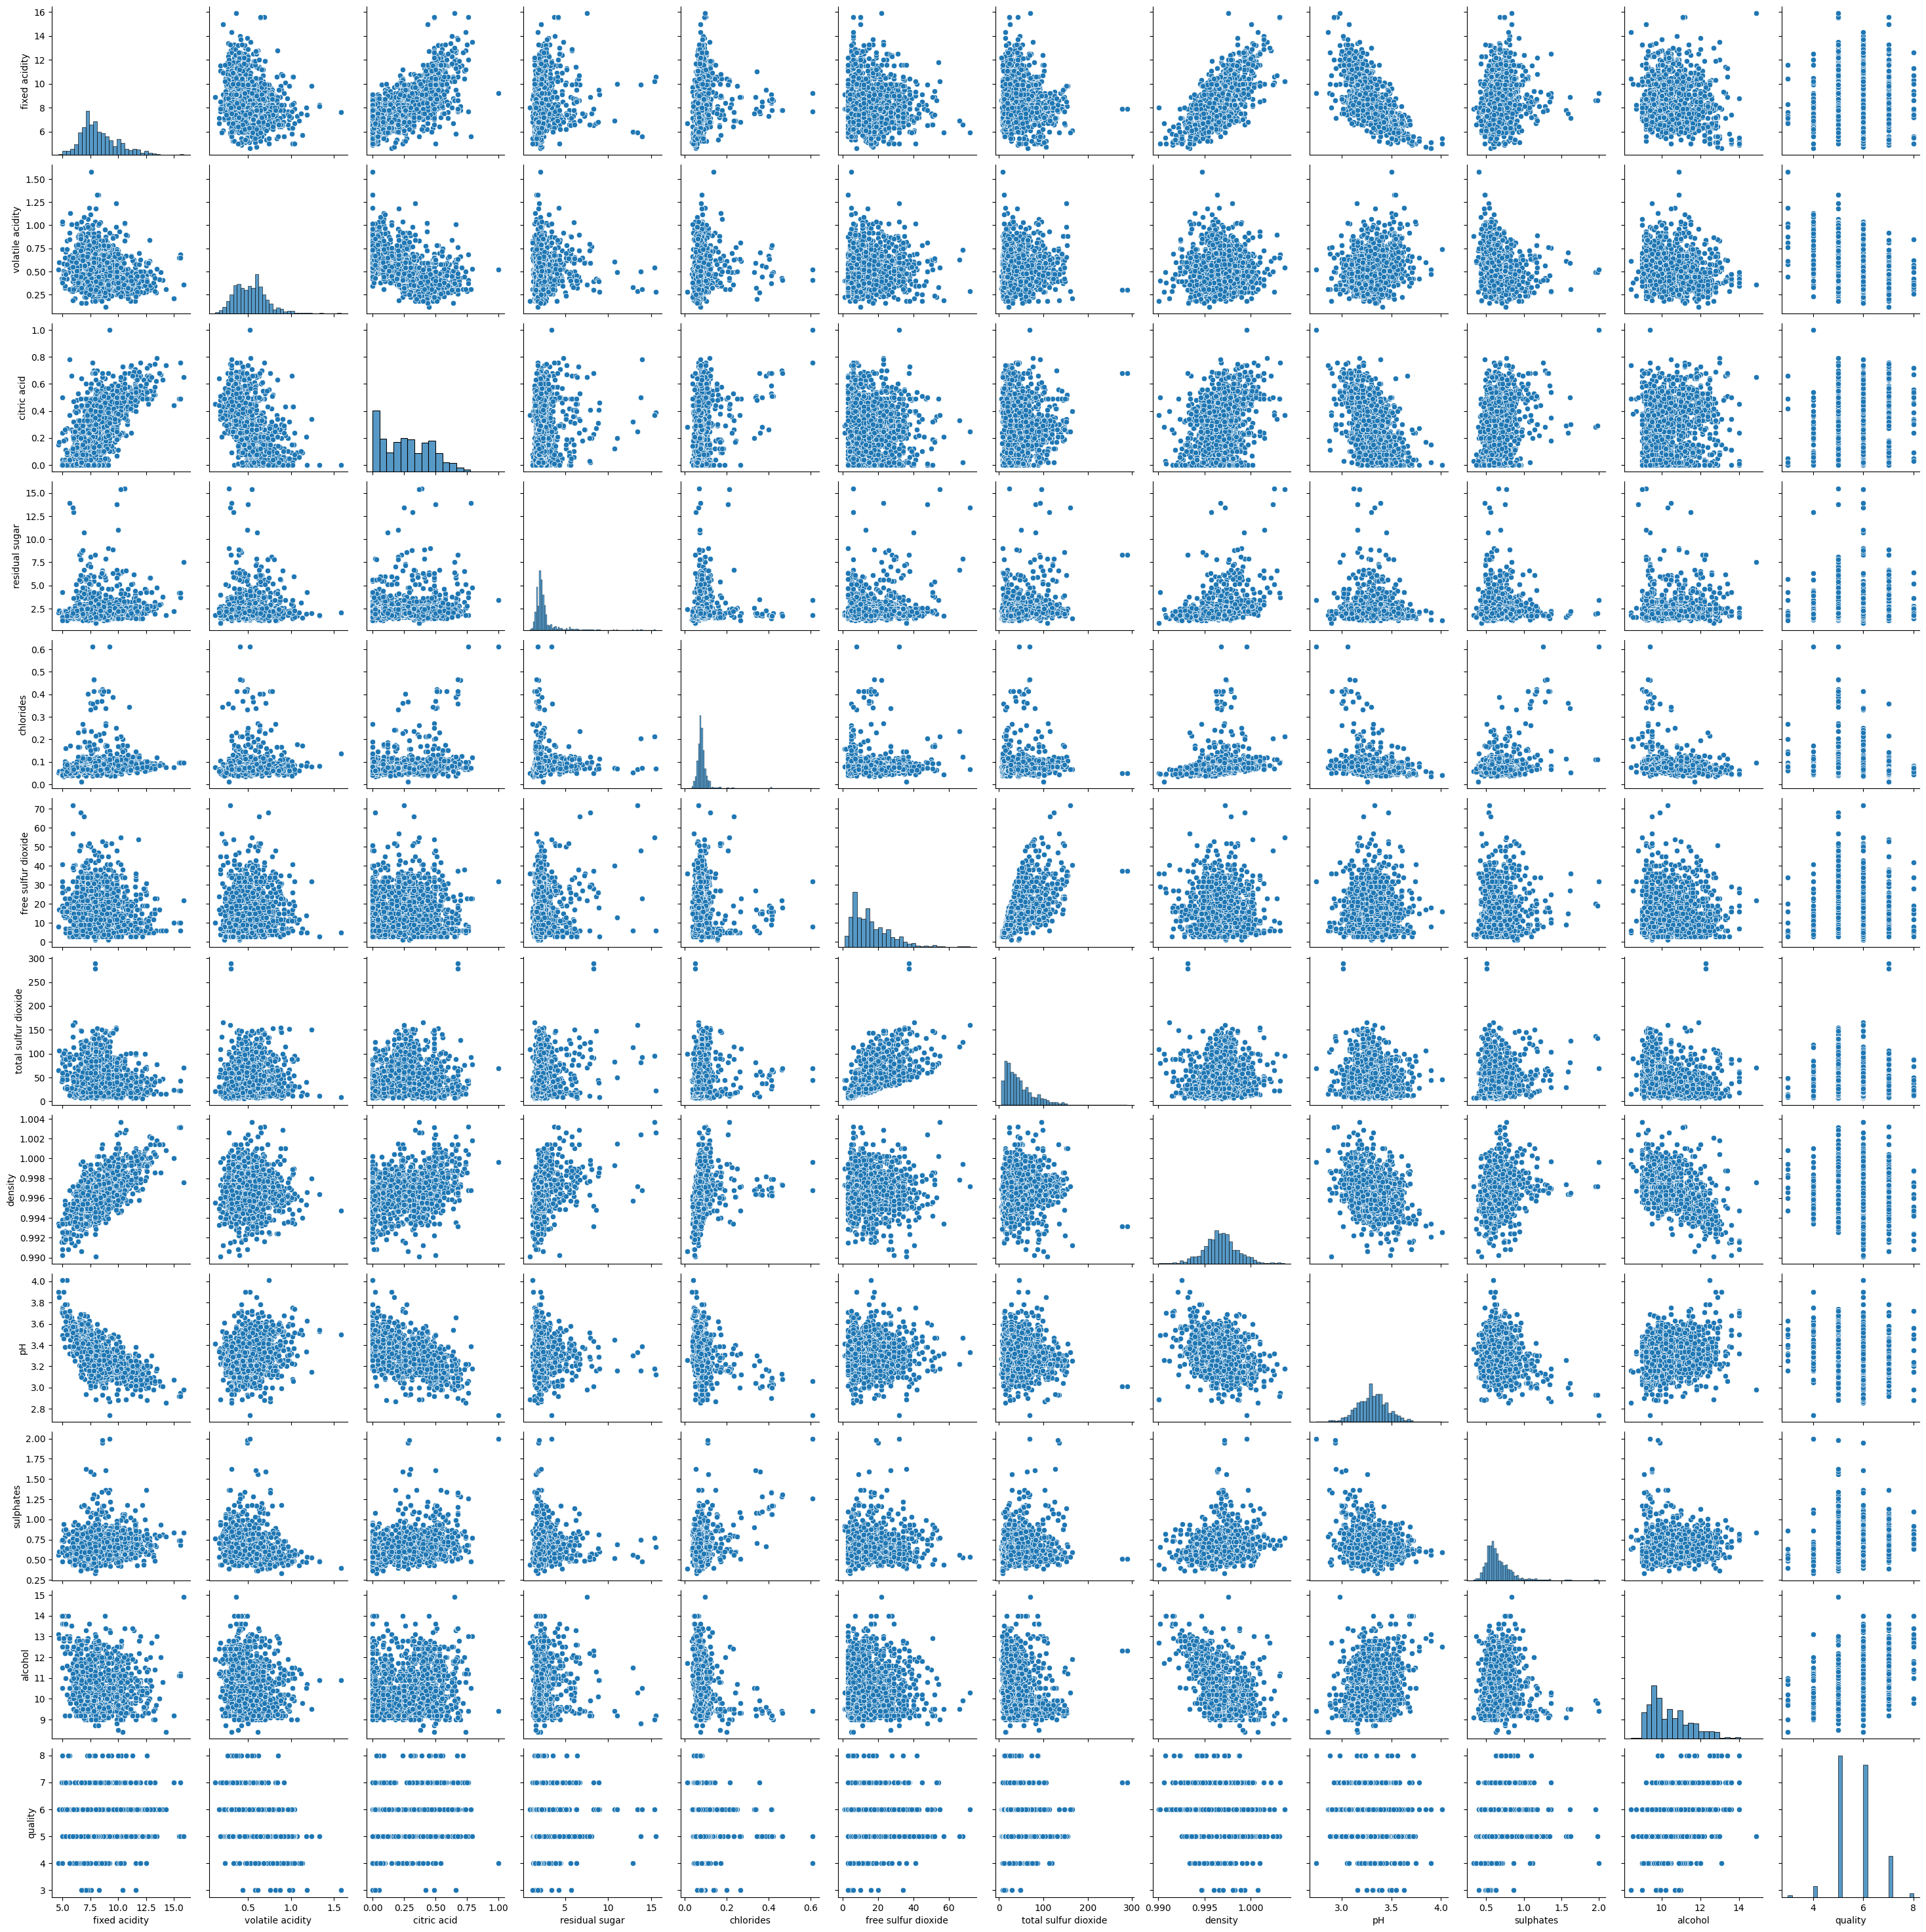

In [3]:
pyplot.figure(figsize=(20, 20))
seaborn.pairplot(df)
pyplot.show()

## 4. Calcular los estadísticos descriptivos para la variable alcohol. Separarlos por estadísticos de tendencia central y de dispersión.

In [4]:
df_promedio = df['alcohol'].mean()
df_mediana = df['alcohol'].median()
df_moda = df['alcohol'].mode()[0]

df_desvstd = df['alcohol'].std()
df_varianza = df['alcohol'].var()
df_rango =  df['alcohol'].max() - df['alcohol'].min(),
df_RI = df['alcohol'].quantile(0.75) - df['alcohol'].quantile(0.25)

print("Estadísticos de tendencia central:")
print(f"Media: {df_promedio}")
print(f"Mediana: {df_mediana}")
print(f"Moda: {df_moda}")
print("")
print(f"Desviación estándar: {df_desvstd}")
print(f"Varianza: {df_varianza}")
print(f"Rango: {df_rango}")
print(f"Rango intercuartílico: {df_RI}")

Estadísticos de tendencia central:
Media: 10.422983114446529
Mediana: 10.2
Moda: 9.5

Desviación estándar: 1.0656675818473946
Varianza: 1.1356473950004737
Rango: (np.float64(6.5),)
Rango intercuartílico: 1.5999999999999996


## 5. Usar StandardScaler de Scikit-Learn para estandarizar dos variables numéricas de su elección

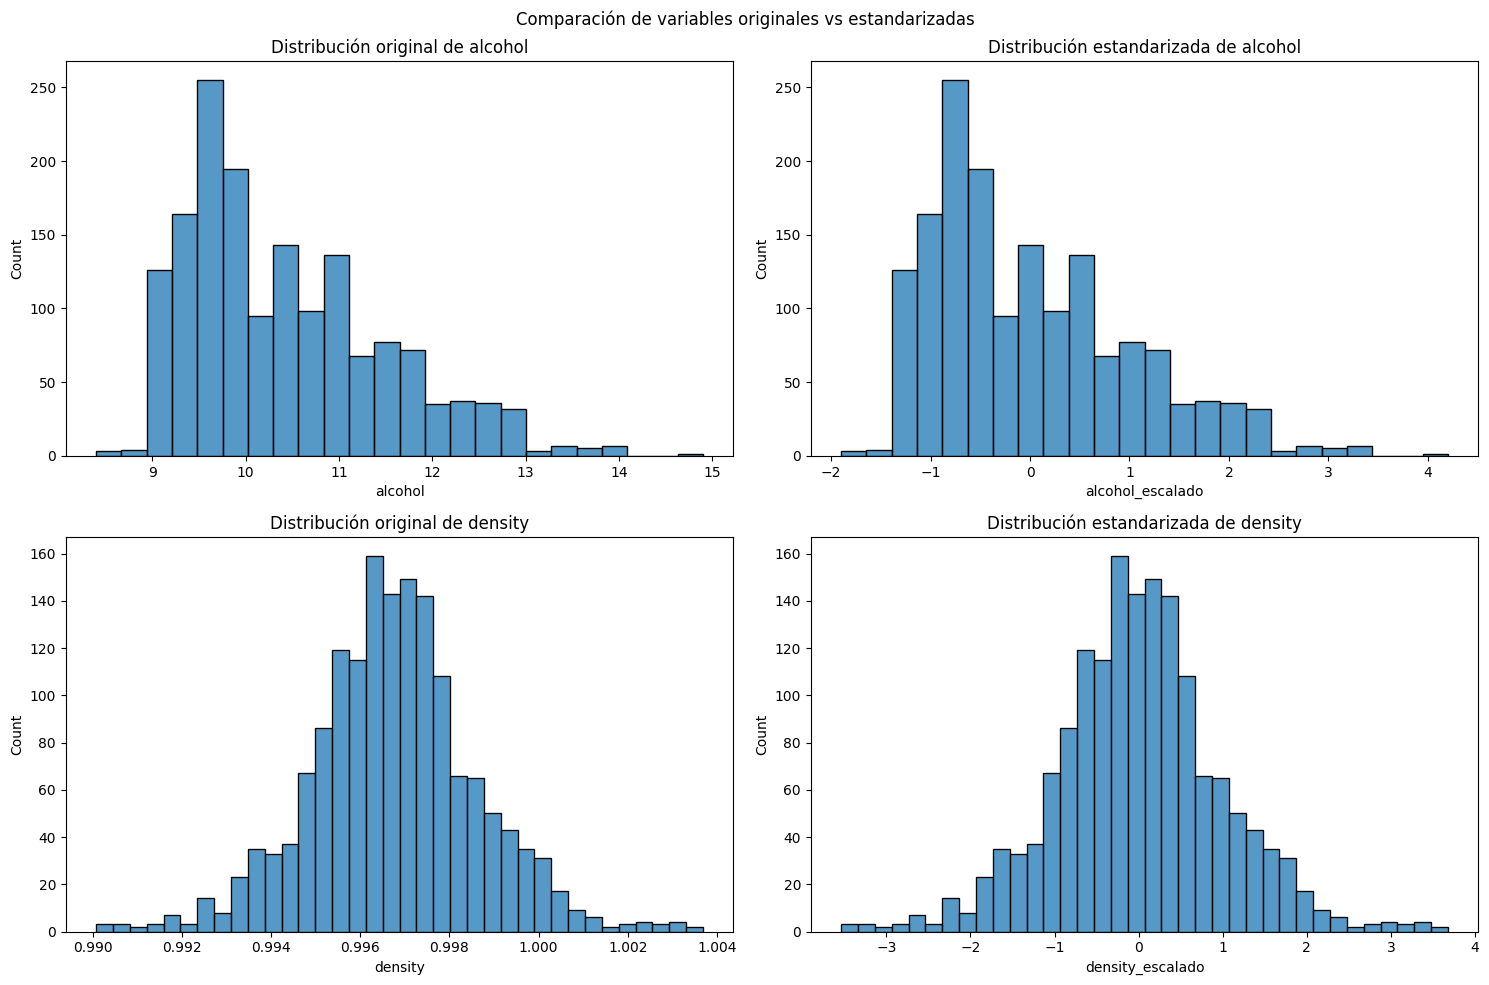


Estadísticos descriptivos de las variables originales:


,alcohol,density
count,1599.000000,1599.000000
mean,10.422983,0.996747
std,1.065668,0.001887
min,8.400000,0.990070
25%,9.500000,0.995600
50%,10.200000,0.996750
75%,11.100000,0.997835
max,14.900000,1.003690



Estadísticos descriptivos de las variables estandarizadas:


,alcohol_escalado,density_escalado
count,1.599000e+03,1.599000e+03
mean,1.066481e-16,-3.473172e-14
std,1.000313e+00,1.000313e+00
min,-1.898919e+00,-3.538731e+00
25%,-8.663789e-01,-6.077557e-01
50%,-2.093081e-01,1.760083e-03
75%,6.354971e-01,5.768249e-01
max,4.202453e+00,3.680055e+00


In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

variables_aestandarizar = ['alcohol', 'density']

escalador = StandardScaler()
datos_escalados = escalador.fit_transform(df[variables_aestandarizar])
df_escalado = pandas.DataFrame(datos_escalados, columns=[ "alcohol_escalado", "density_escalado" ])

fig, axes = pyplot.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Comparación de variables originales vs estandarizadas')

for indice, variable in enumerate(variables_aestandarizar):
    seaborn.histplot(data=df[variable], ax=axes[indice, 0])
    axes[indice, 0].set_title(f'Distribución original de {variable}')
    
    seaborn.histplot(data=df_escalado[f"{variable}_escalado"], ax=axes[indice, 1])
    axes[indice, 1].set_title(f'Distribución estandarizada de {variable}')

pyplot.tight_layout()
pyplot.show()

print("\nEstadísticos descriptivos de las variables originales:")
display(df[variables_aestandarizar].describe())

print("\nEstadísticos descriptivos de las variables estandarizadas:")
display(df_escalado.describe())

## 6. Normalización con MinMaxScaler

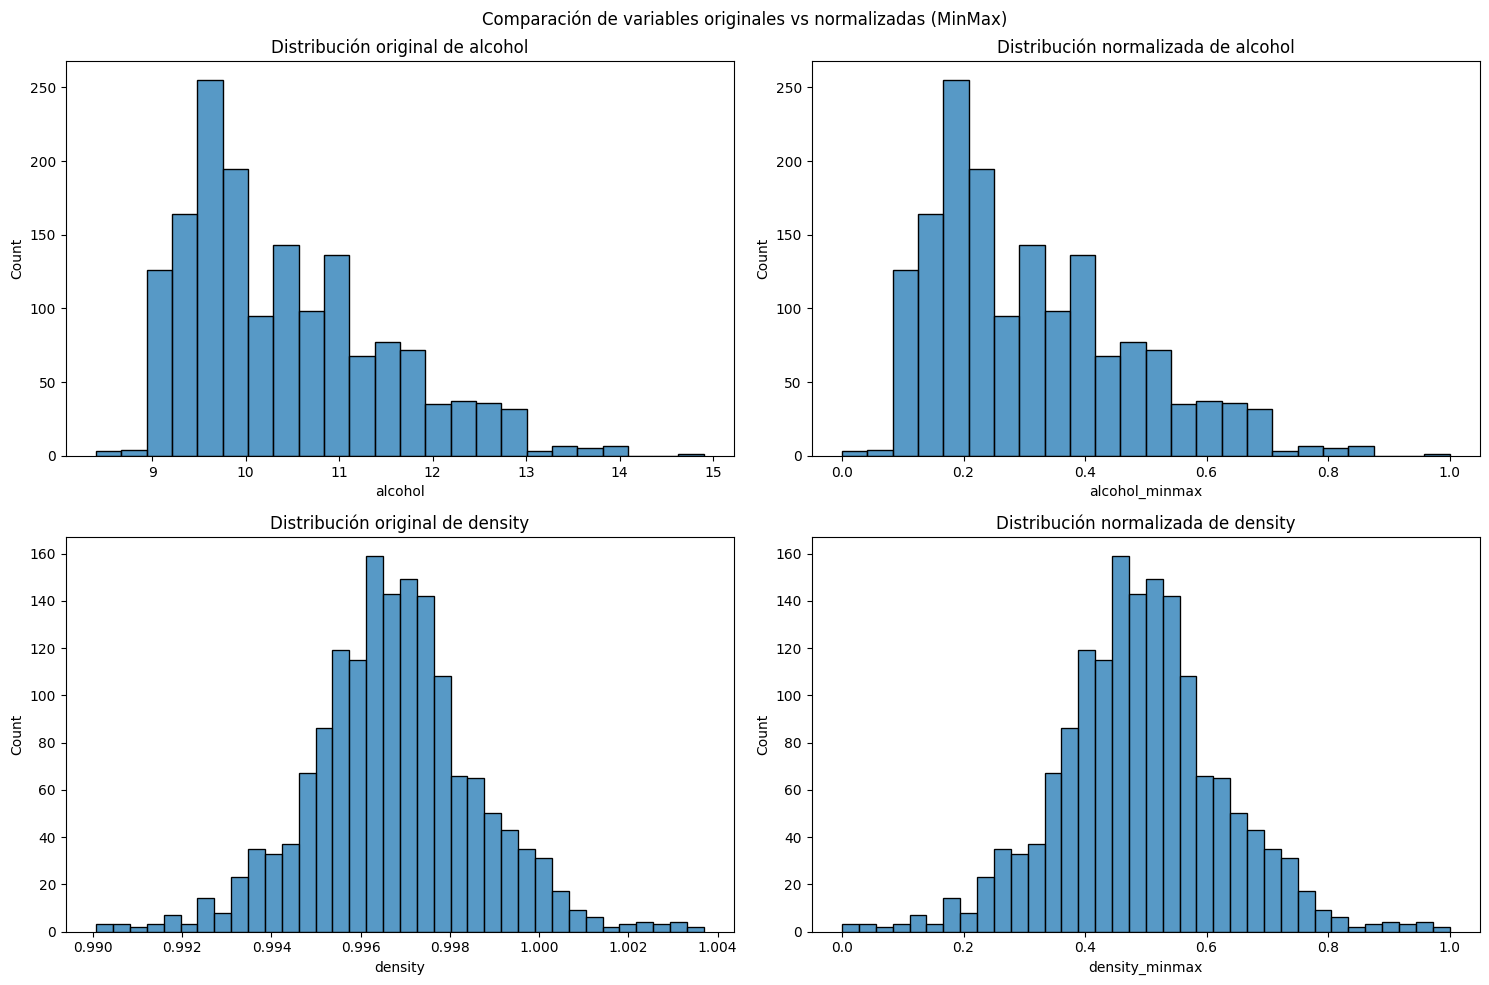


Estadísticos descriptivos de las variables normalizadas:


,alcohol_minmax,density_minmax
count,1599.000000,1599.000000
mean,0.311228,0.490211
std,0.163949,0.138571
min,0.000000,0.000000
25%,0.169231,0.406021
50%,0.276923,0.490455
75%,0.415385,0.570117
max,1.000000,1.000000


In [6]:
min_max_scaler = MinMaxScaler()
minmax_escalado = min_max_scaler.fit_transform(df[variables_aestandarizar])
df_minmax = pandas.DataFrame(minmax_escalado, columns=["alcohol_minmax", "density_minmax"])

figura, ejes = pyplot.subplots(2, 2, figsize=(15, 10))
figura.suptitle('Comparación de variables originales vs normalizadas (MinMax)')

for indice, variable in enumerate(variables_aestandarizar):
    seaborn.histplot(data=df[variable], ax=ejes[indice, 0])
    ejes[indice, 0].set_title(f'Distribución original de {variable}')
    
    seaborn.histplot(data=df_minmax[f"{variable}_minmax"], ax=ejes[indice, 1])
    ejes[indice, 1].set_title(f'Distribución normalizada de {variable}')

pyplot.tight_layout()
pyplot.show()

print("\nEstadísticos descriptivos de las variables normalizadas:")
display(df_minmax.describe())

## 7. Matriz de correlaciones

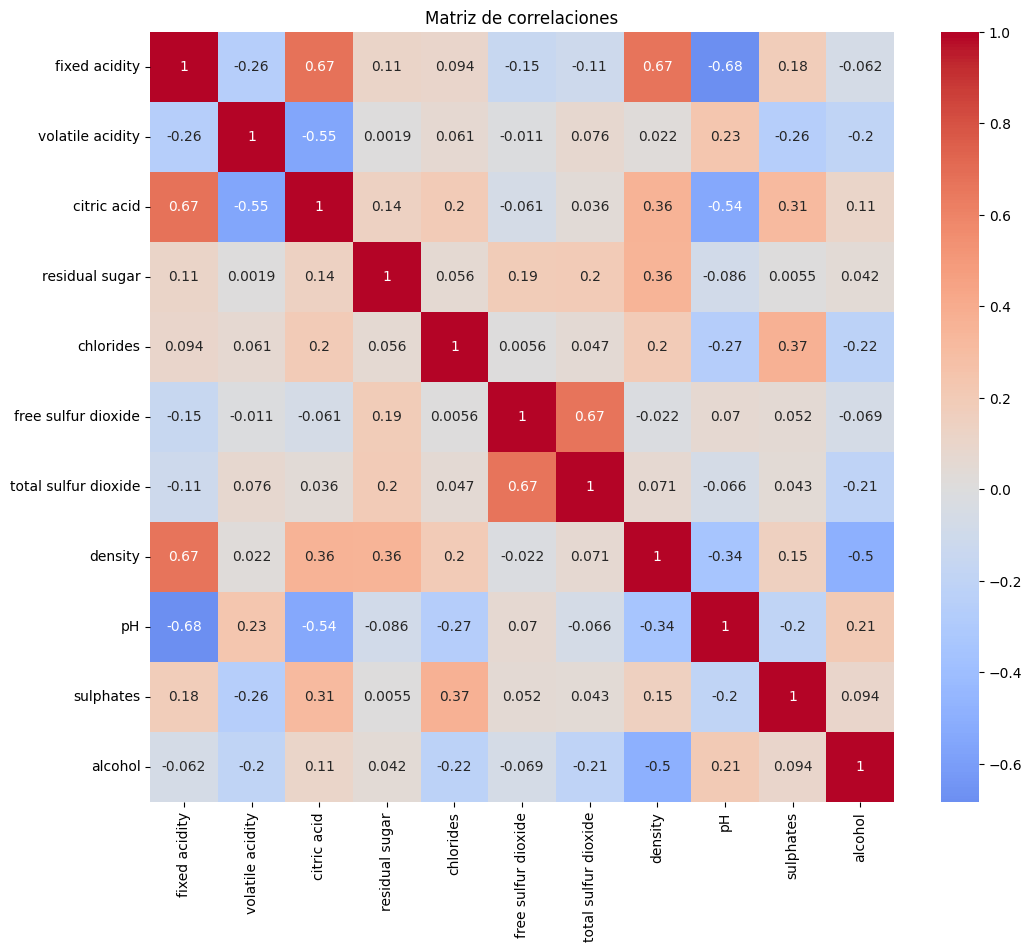

In [7]:
# Obtener todas las variables numéricas excepto quality
columnas_numericas = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]

# Calcular la matriz de correlaciones
corr_matrix = df[columnas_numericas].corr()

# Visualizar la matriz de correlaciones
pyplot.figure(figsize=(12, 10))
seaborn.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
pyplot.title('Matriz de correlaciones')
pyplot.show()

## 8. Correlaciones con respecto a `density`

In [8]:
correlacion_densidad = corr_matrix['density'].sort_values(ascending=False)
print("Correlaciones con density en orden descendente:")
display(correlacion_densidad)



Correlaciones con density en orden descendente:


density                 1.000000
fixed acidity           0.668047
citric acid             0.364947
residual sugar          0.355283
chlorides               0.200632
sulphates               0.148506
total sulfur dioxide    0.071269
volatile acidity        0.022026
free sulfur dioxide    -0.021946
pH                     -0.341699
alcohol                -0.496180
Name: density, dtype: float64

## 9. Variables cuyo valor absoluto de correlación es mayor o igual a 0.4

In [9]:
print("\nVariables con correlación significativa (|corr| >= 0.4) con density:")
correlaciones_significativas = correlacion_densidad[abs(correlacion_densidad) >= 0.4]
correlaciones_significativas = correlaciones_significativas[correlaciones_significativas.index != 'density']  # Excluir la autocorrelación
display(correlaciones_significativas)


Variables con correlación significativa (|corr| >= 0.4) con density:


fixed acidity    0.668047
alcohol         -0.496180
Name: density, dtype: float64